In [1]:
# Start

import datetime

current_time = datetime.datetime.now()

print("Current date and time: ", current_time)

Current date and time:  2023-03-18 13:47:07.172575


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# View first 5 rows in the dataset

df = pd.read_csv('covid_worldwide.csv')

print(df.head())

   Serial Number  Country  Total Cases Total Deaths Total Recovered  \
0              1      USA  104,196,861    1,132,935     101,322,779   
1              2    India   44,682,784      530,740      44,150,289   
2              3   France   39,524,311      164,233      39,264,546   
3              4  Germany   37,779,833      165,711      37,398,100   
4              5   Brazil   36,824,580      697,074      35,919,372   

  Active Cases     Total Test     Population  
0    1,741,147  1,159,832,679    334,805,269  
1        1,755    915,265,788  1,406,631,776  
2       95,532    271,490,188     65,584,518  
3      216,022    122,332,384     83,883,596  
4      208,134     63,776,166    215,353,593  


In [3]:
# Last 5 rows

df.tail()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
226,227,Diamond Princess,712,13,699,0,NaN,NaN
227,228,Vatican City,29,NaN,29,0,NaN,799
228,229,Western Sahara,10,1,9,0,NaN,"626,161"
229,230,MS Zaandam,9,2,7,0,NaN,NaN
230,231,Tokelau,5,NaN,NaN,5,NaN,"1,378"


In [4]:
df

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
...,...,...,...,...,...,...,...,...
226,227,Diamond Princess,712,13,699,0,NaN,NaN
227,228,Vatican City,29,NaN,29,0,NaN,799
228,229,Western Sahara,10,1,9,0,NaN,"626,161"
229,230,MS Zaandam,9,2,7,0,NaN,NaN


In [4]:
# Summary of what the dataset entails
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Serial Number    231 non-null    int64 
 1   Country          231 non-null    object
 2   Total Cases      231 non-null    object
 3   Total Deaths     225 non-null    object
 4   Total Recovered  210 non-null    object
 5   Active Cases     212 non-null    object
 6   Total Test       213 non-null    object
 7   Population       228 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.6+ KB


In [5]:
# Check for Columns with null values

df.isna().any()

Serial Number      False
Country            False
Total Cases        False
Total Deaths        True
Total Recovered     True
Active Cases        True
Total Test          True
Population          True
dtype: bool

In [6]:
# Check for null values in each column and print
null_values = df.isnull().sum()

print(null_values)

Serial Number       0
Country             0
Total Cases         0
Total Deaths        6
Total Recovered    21
Active Cases       19
Total Test         18
Population          3
dtype: int64


In [8]:
# select rows with null values and print
null_rows = df[df.isnull().any(axis=1)]

print(null_rows)

     Serial Number                 Country Total Cases Total Deaths  \
10              11                  Turkey  17,042,722      101,492   
29              30                    DPRK   4,772,813           74   
65              66                 Tunisia   1,150,356       29,308   
77              78                Paraguay     806,256       19,820   
90              91                   China     503,302        5,272   
94              95                Honduras     470,757       11,104   
111            112              Martinique     229,687        1,097   
112            113                    Laos     217,973          758   
113            114                 Iceland     208,688          229   
117            118              Guadeloupe     201,394        1,007   
136            137                Suriname      82,020        1,398   
138            139        French Polynesia      77,957          649   
150            151              Seychelles      50,665          172   
156   

In [15]:
# Fill null cells with zero(0)

df.fillna(0)

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
...,...,...,...,...,...,...,...,...
226,227,Diamond Princess,712,13,699,0,0,0
227,228,Vatican City,29,0,29,0,0,799
228,229,Western Sahara,10,1,9,0,0,"626,161"
229,230,MS Zaandam,9,2,7,0,0,0


In [8]:
# Dropping rows with NaN values
df.dropna(axis = 0, inplace = True)

In [9]:
# Check columns with null values and print
null_cols = df.columns[df.isnull().any()]

print(null_cols)

Index([], dtype='object')


In [11]:
df.tail()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
217,218,Anguilla,"3,904",12,"3,879",13,"51,382","15,230"
218,219,Macao,"3,488",120,"3,357",11,"7,850","667,490"
219,220,Saint Pierre Miquelon,"3,452",2,"2,449","1,001","25,400","5,759"
220,221,Wallis and Futuna,"3,427",7,438,"2,982","20,508","10,982"
224,225,Montserrat,"1,403",8,"1,376",19,"17,762","4,965"


In [13]:
 # In the dataset, there are value input with comma, the code below 
# removes them and converts the data in the columns to int

df['Total Cases'] = df['Total Cases'].astype(str).str.replace(',', '').astype(int)
df['Total Deaths'] = df['Total Deaths'].astype(str).str.replace(',', '').astype(int)
df['Total Recovered'] = df['Total Recovered'].astype(str).str.replace(',', '').astype(int)
df['Active Cases'] = df['Active Cases'].astype(str).str.replace(',', '').astype(int)
df['Total Test'] = df['Total Test'].astype(str).str.replace(',', '').astype(int)
df['Population'] = df['Population'].astype(str).str.replace(',', '').astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 224
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Serial Number    195 non-null    int64 
 1   Country          195 non-null    object
 2   Total Cases      195 non-null    int64 
 3   Total Deaths     195 non-null    int64 
 4   Total Recovered  195 non-null    int64 
 5   Active Cases     195 non-null    int64 
 6   Total Test       195 non-null    int64 
 7   Population       195 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 13.7+ KB


# To visualize cases for the top 10 countries

    Country  Total Cases
0       USA    104196861
1     India     44682784
2    France     39524311
3   Germany     37779833
4    Brazil     36824580
5     Japan     32588442
6  S. Korea     30197066
7     Italy     25453789
8        UK     24274361
9    Russia     21958696


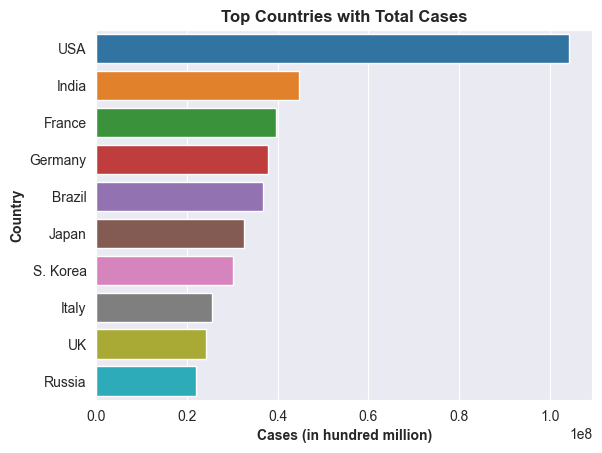

In [42]:
# Cases by COuntry

country_case = df[['Country', 'Total Cases']]

country_case_plot = country_case.sort_values('Total Cases', ascending=False).head(10)

sns.set_style("darkgrid")

ccplot = sns.barplot(x='Total Cases', y='Country', data=country_case_plot)
ccplot.set_ylabel('Country', fontweight='bold')
ccplot.set_xlabel('Cases (in hundred million)', fontweight='bold')
ccplot.set_title('Top Countries with Total Cases', fontweight='heavy')


print(country_case_plot)

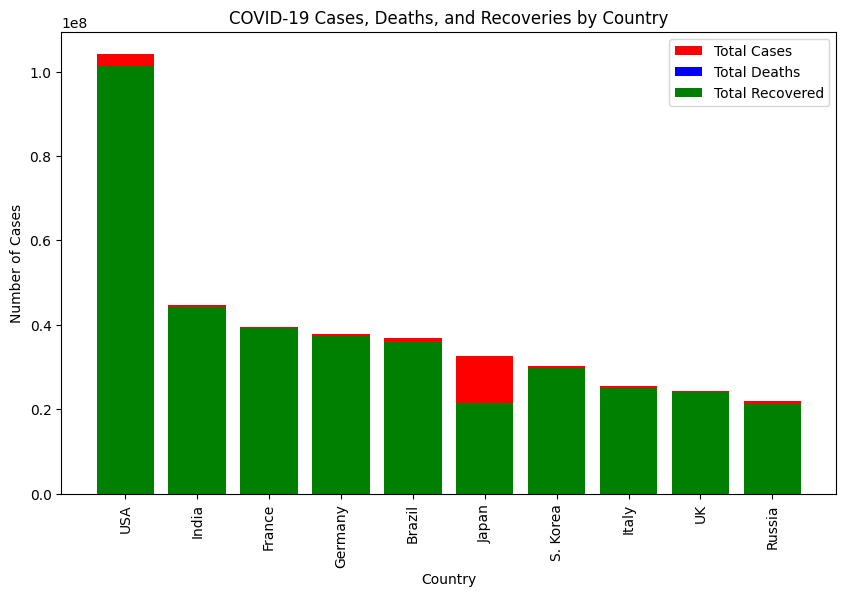

In [21]:
# Define the data
countries = df['Country'].head(10)
total_cases = df['Total Cases'].head(10)
total_deaths = df['Total Deaths'].head(10)
total_recovered = df['Total Recovered'].head(10)

# Define the colors for each bar
colors = ['red', 'blue', 'green']

# Create the bar chart
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(countries, total_cases, color=colors[0], label='Total Cases')
ax.bar(countries, total_deaths, color=colors[1], label='Total Deaths')
ax.bar(countries, total_recovered, color=colors[2], label='Total Recovered')

# Set the chart title, axis labels, and legend
plt.title('COVID-19 Cases, Deaths, and Recoveries by Country')
plt.xlabel('Country')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Show the chart
plt.show()


# To visualize cases for the last 10 countries

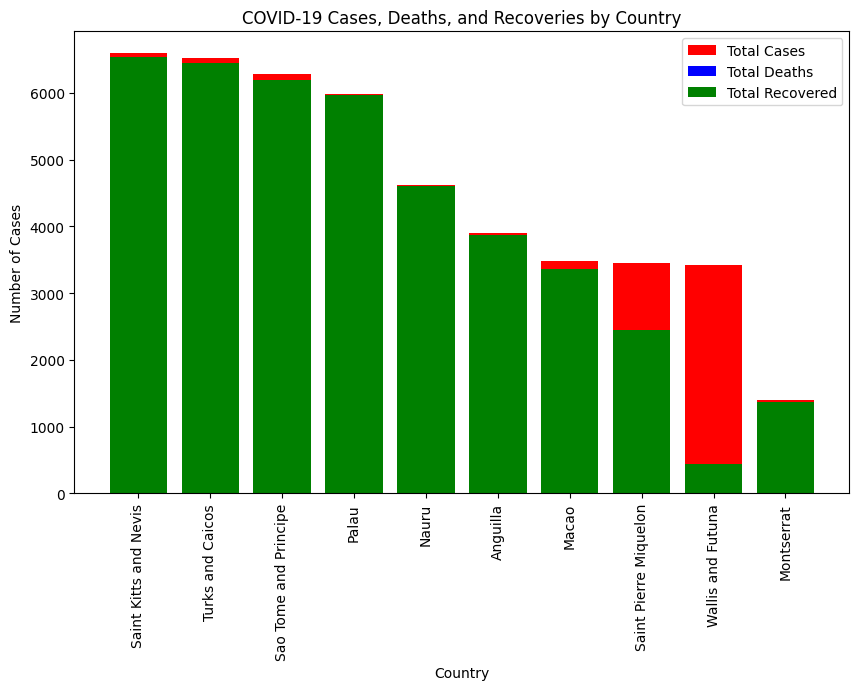

In [22]:
# Define the data
countries = df['Country'].tail(10)
total_cases = df['Total Cases'].tail(10)
total_deaths = df['Total Deaths'].tail(10)
total_recovered = df['Total Recovered'].tail(10)

# Define the colors for each bar
colors = ['red', 'blue', 'green']

# Create the bar chart
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(countries, total_cases, color=colors[0], label='Total Cases')
ax.bar(countries, total_deaths, color=colors[1], label='Total Deaths')
ax.bar(countries, total_recovered, color=colors[2], label='Total Recovered')

# Set the chart title, axis labels, and legend
plt.title('COVID-19 Cases, Deaths, and Recoveries by Country')
plt.xlabel('Country')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Show the chart
plt.show()

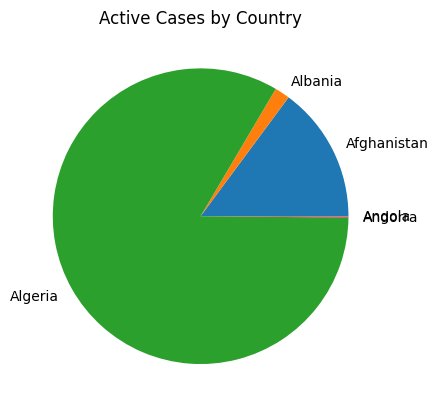

In [27]:
# Group by country and sum up active cases
by_country = df.groupby('Country')['Active Cases'].sum().head(5)

# Create pie chart
plt.pie(by_country.values, labels=by_country.index)

# Set title
plt.title('Active Cases by Country')

plt.show()


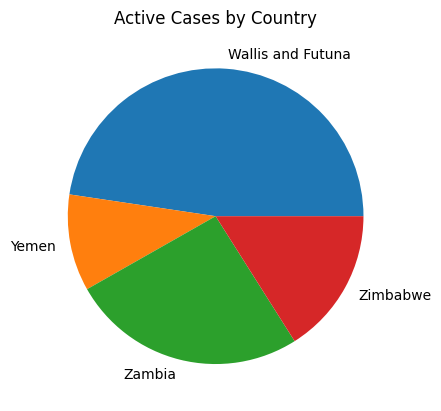

In [33]:
# Group by country and sum up active cases
by_country = df.groupby('Country')['Active Cases'].sum().tail(4)

# Create pie chart
plt.pie(by_country.values, labels=by_country.index)

# Set title
plt.title('Active Cases by Country')

plt.show()

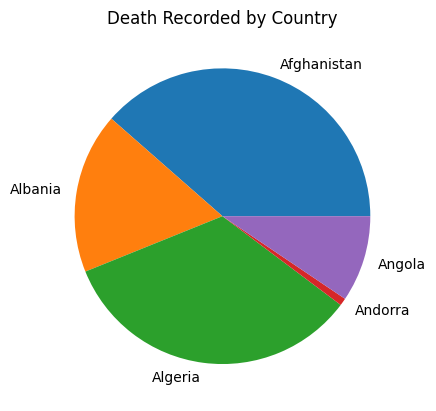

In [26]:
# Group by country and sum up active cases
by_country = df.groupby('Country')['Total Deaths'].sum().head(5)

# Create pie chart
plt.pie(by_country.values, labels=by_country.index)

# Set title
plt.title('Death Recorded by Country')

plt.show()


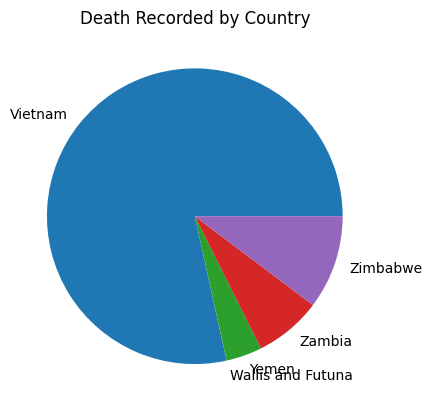

In [34]:
# Group by country and sum up active cases
by_country = df.groupby('Country')['Total Deaths'].sum().tail(5)

# Create pie chart
plt.pie(by_country.values, labels=by_country.index)

# Set title
plt.title('Death Recorded by Country')

plt.show()

# A choropleth map of cases, deaths, and recoveries

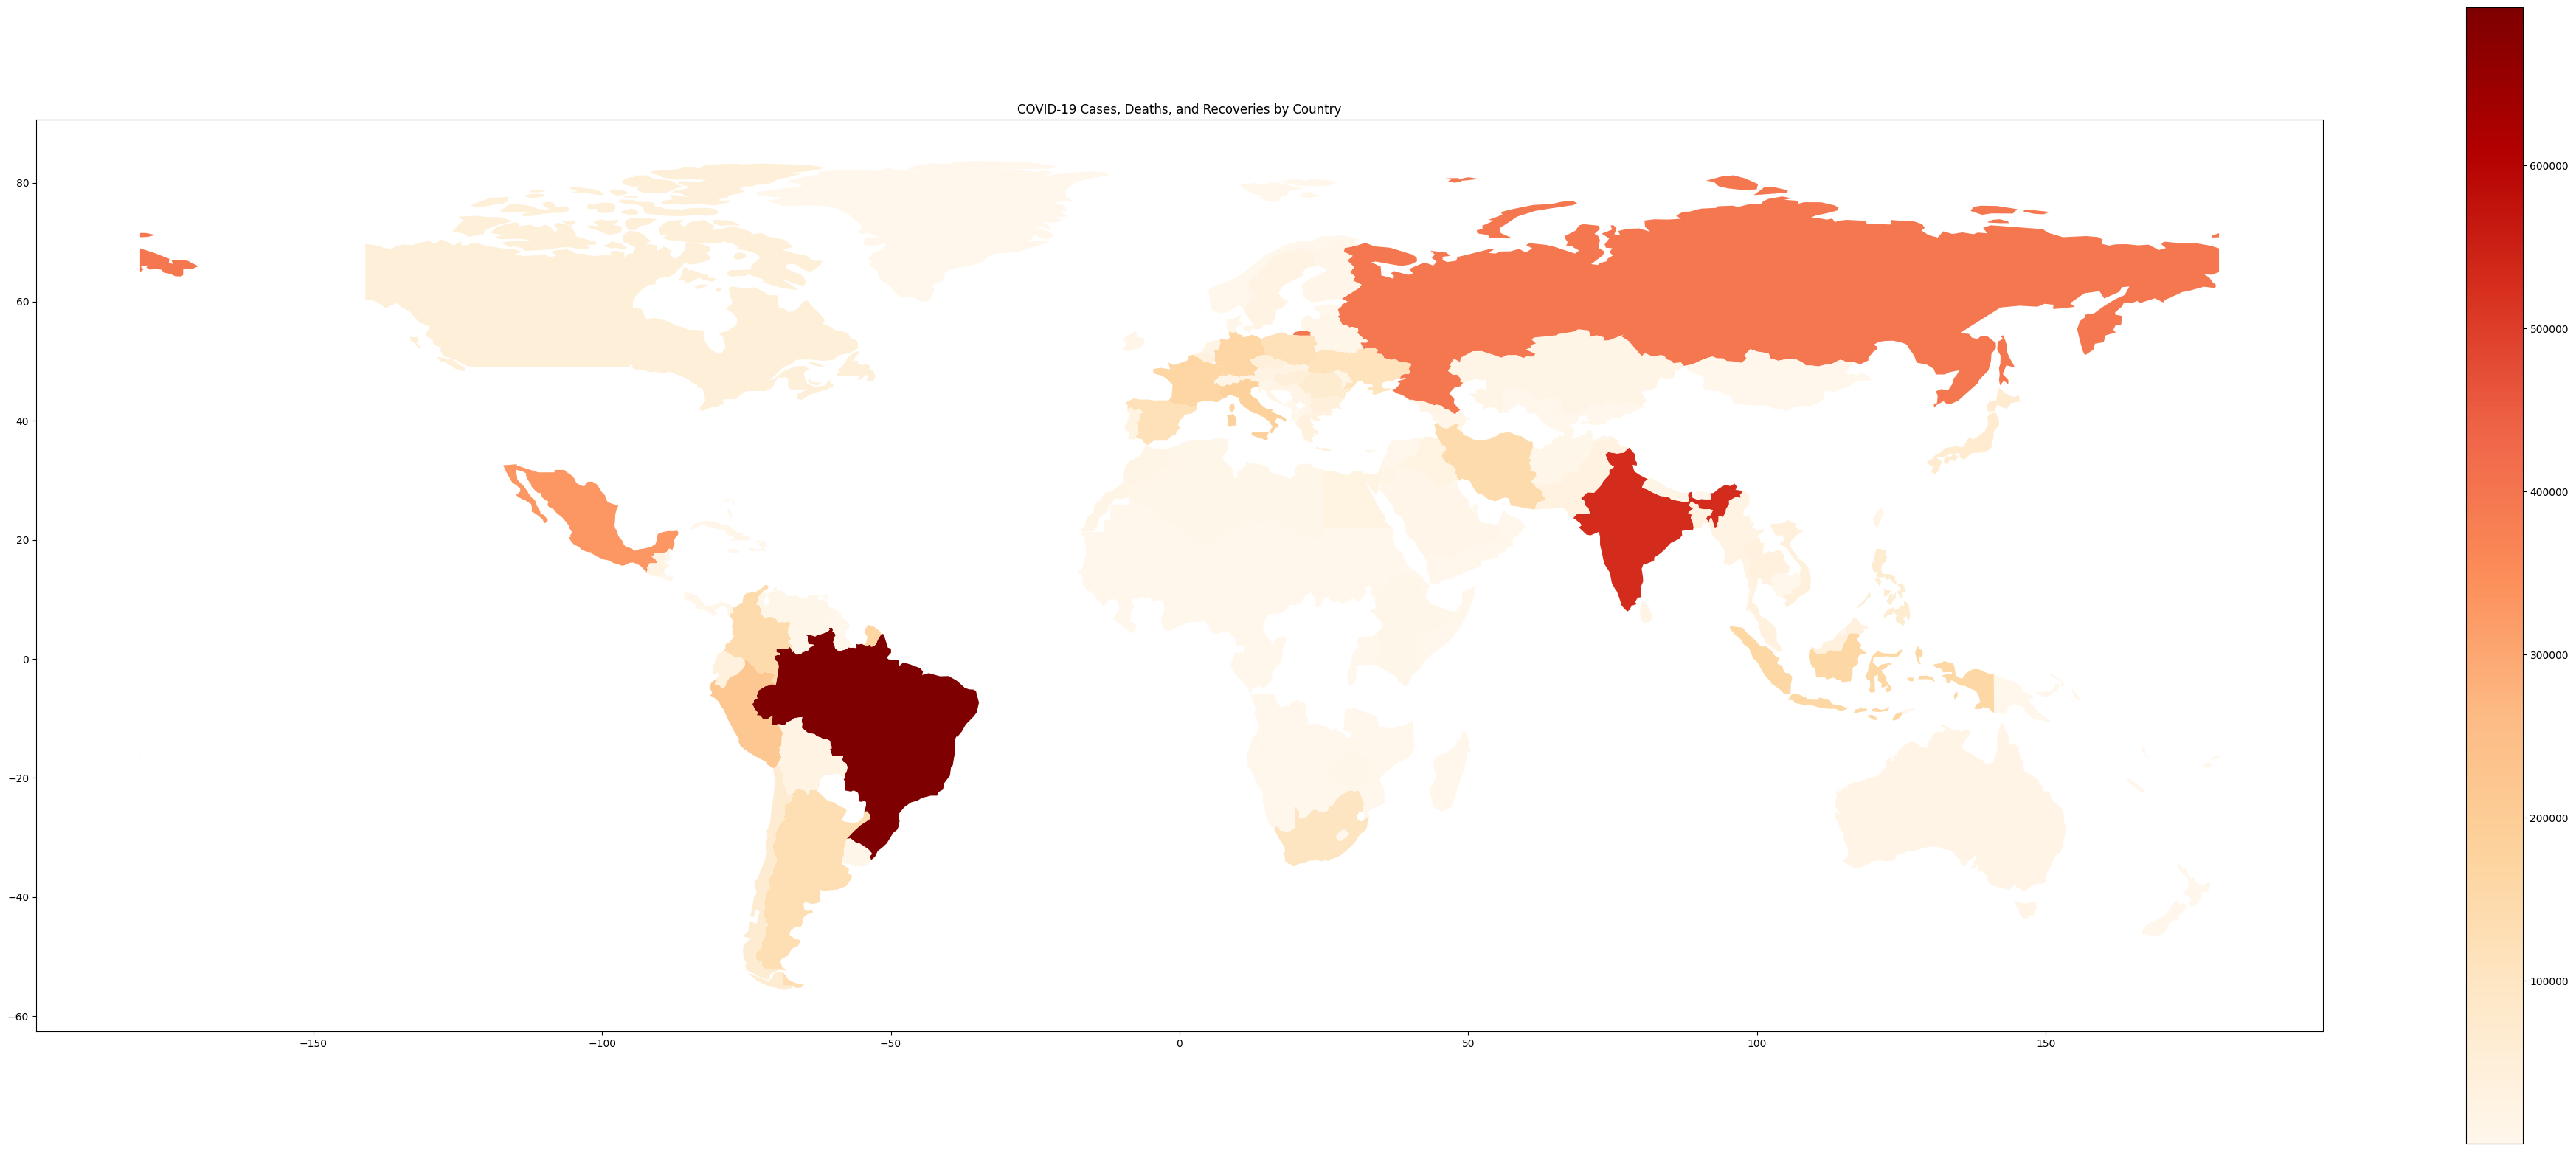

In [39]:
import geopandas as gpd


# Load world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge data with map
merged = world.merge(df, left_on='name', right_on='Country')

# Create map
fig, ax = plt.subplots(figsize=(50, 20))
ax.set_title('COVID-19 Cases, Deaths, and Recoveries by Country')
merged.plot(column='Total Deaths', cmap='OrRd', legend=True, ax=ax)
plt.show()

